As the use cases for your neural network models get more complex, it's quite possible that your model topology also becomes more complex. If you want to move beyond simple feed‑forward models and have more control over your model's architecture and design, you'll use the Keras functional API. 

This is what is used to build complex model topologies that cannot be constructed using the sequential APIs. In the very basic use case for a neural network, you just have one input to any model. 

**You'll use the functional API if you want to construct models that accept multiple inputs, The functional API also supports multi‑output models, where the output is not just a single category of labels. Multiple levels might apply to the input data.**

In more complex computation graphs, you might have layers that are shared across multiple neural networks, which come in multiple parts. Models with shared layers are also constructed using the functional API, and also models with non‑sequential data flows. 

In this notebook, we'll build a binary classification model using the functional API.

**The sequential API is inherently object‑oriented, where the layers are objects which are the building blocks for your model. As its name suggests, the functional API is more functional in nature.**

Here every layer object is actually a callable that can be invoked on the inputs to the layer. When using the functional API, you actually invoke or call a layer and pass in the input data, and the layer applies transformations to the simple data. Every layer in the Keras functional API is a callable, and Keras models can also be called on any tensor, just like the individual layers. 


## Sequential Model

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [ ]:
input1 = Input(shape=(5,))

hidden1 = Dense(5, activation='relu')(input1)
hidden2 = Dense(10, activation='relu')(hidden1)
hidden3 = Dense(50, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)

model = Model(inputs=input1, outputs=output)

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________
None


https://keras.io/visualization/    

In [ ]:
# pip install pydot

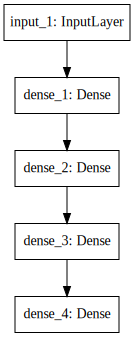

In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Shared Input Layer

In [ ]:
# Shared Input Layer

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# input layer
input1 = Input(shape=(64,64,1))

conv1 = Conv2D(16, kernel_size=2, activation='relu')(input1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
flat1 = Flatten()(pool1)

conv2 = Conv2D(8, kernel_size=4, activation='relu')(input1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)

merge = concatenate([flat1, flat2])

# Adding hidden layer
hidden1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=input1, outputs=output)

# summarize layers
print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 63, 63, 16)   80          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 61, 61, 8)    136         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 31, 31, 16)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_poolin

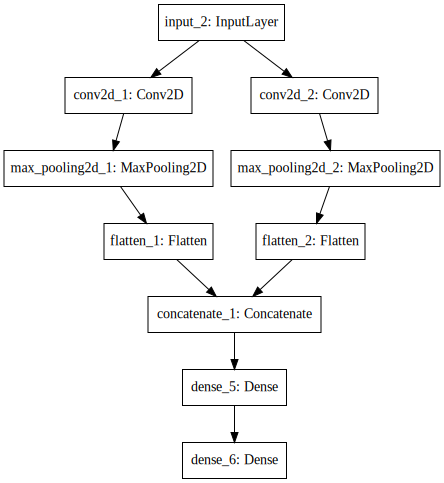

In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Shared Middle Layer


In [ ]:
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate

# define input
input1 = Input(shape=(100,1))
# feature extraction
extract1 = LSTM(10)(input1)

# first extract
interp1 = Dense(10, activation='relu')(extract1)

# second extract model
interp11 = Dense(10, activation='relu')(extract1)
interp12 = Dense(20, activation='relu')(interp11)
interp13 = Dense(10, activation='relu')(interp12)

merge = concatenate([interp1, interp13])

# output
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=input1, outputs=output)

# summarize layers
print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 100, 1)       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 10)           480         input_4[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 10)           110         lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 20)           220         dense_8[0][0]                    
__________________________________________________________________________________________________
dense_7 (D

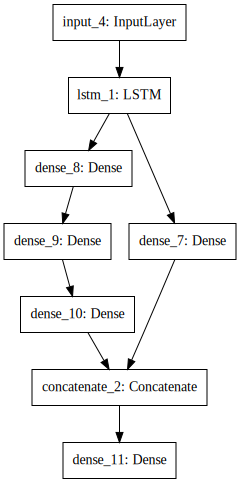

In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Multiple Inputs

In [ ]:
# First Input
input1 = Input(shape=(64,64,1))   # B&W image
conv11 = Conv2D(32, kernel_size=4, activation='relu')(input1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)

# Next Input
input2 = Input(shape=(32,32,3))   # COLOR IMAGE
conv21 = Conv2D(32, kernel_size=4, activation='relu')(input2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)

# merge input models
merge = concatenate([flat1, flat2])

# Adding Dense layers
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=[input1, input2], outputs=output)

# summarize layers
print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 61, 61, 32)   544         input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 29, 29, 32)   1568        input_9[0][0]                    
__________________________________________________________________________________________________
max_poolin

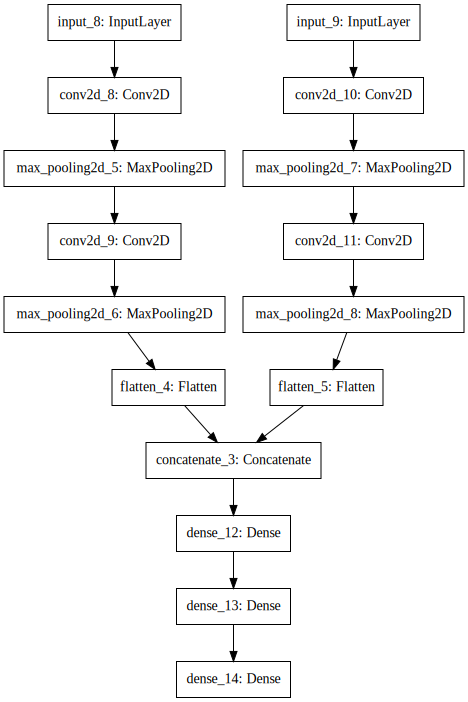

In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))